<a href="https://colab.research.google.com/github/OsmarVar/Unidad-1-Simulacion/blob/main/Metodo_de_Composicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Parámetros de las distribuciones normales
mu1, sigma1, p1 = 0, 1, 0.5  # Media, desviación estándar y peso de la primera normal
mu2, sigma2, p2 = 5, 1, 0.5  # Media, desviación estándar y peso de la segunda normal

In [3]:
# Generar muestras usando el método de composición
def generar_muestras(mu1, sigma1, p1, mu2, sigma2, p2, tamaño=1000):
    muestras = []
    for _ in range(tamaño):
        if np.random.rand() < p1:
            muestras.append(np.random.normal(mu1, sigma1))
        else:
            muestras.append(np.random.normal(mu2, sigma2))
    return np.array(muestras)

In [4]:
# Generar muestras
tamaño_muestra = 10000
muestras = generar_muestras(mu1, sigma1, p1, mu2, sigma2, p2, tamaño=tamaño_muestra)

In [5]:
# Crear una función que defina la PDF de la mezcla de normales
def pdf_mixta(x, mu1, sigma1, p1, mu2, sigma2, p2):
    return p1 * norm.pdf(x, mu1, sigma1) + p2 * norm.pdf(x, mu2, sigma2)

In [6]:
# Crear una función que defina la CDF de la mezcla de normales
def cdf_mixta(x, mu1, sigma1, p1, mu2, sigma2, p2):
    return p1 * norm.cdf(x, mu1, sigma1) + p2 * norm.cdf(x, mu2, sigma2)

In [7]:
# Valores x para las gráficas
x = np.linspace(-5, 10, 1000)

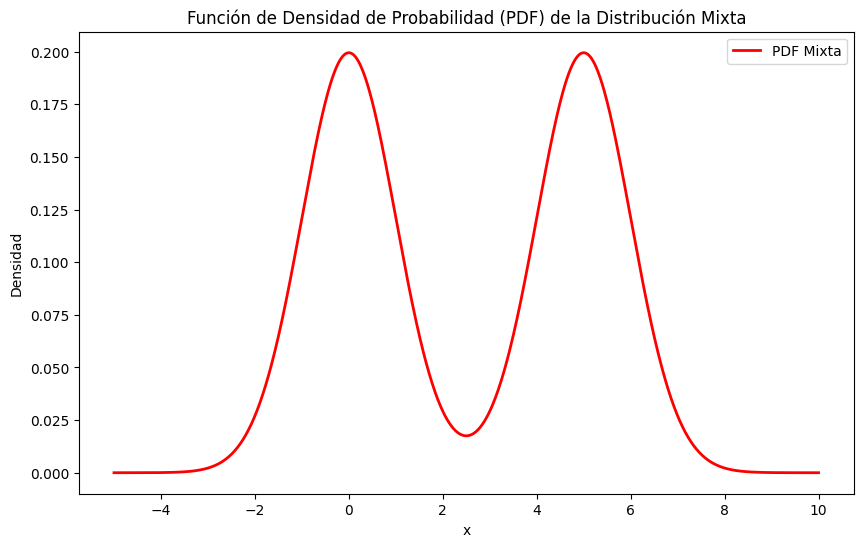

In [8]:
# Graficar la PDF de la distribución mixta
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_mixta(x, mu1, sigma1, p1, mu2, sigma2, p2), 'r-', lw=2, label='PDF Mixta')
plt.title('Función de Densidad de Probabilidad (PDF) de la Distribución Mixta')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

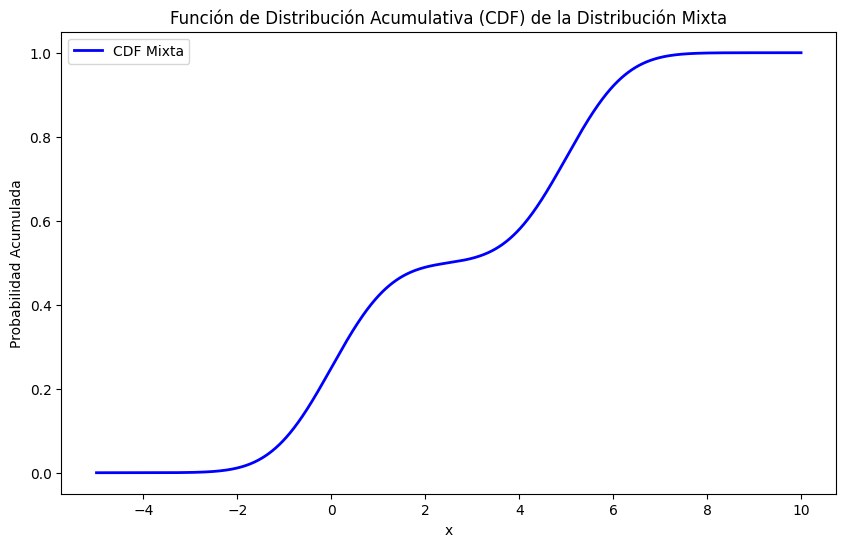

In [9]:
# Graficar la CDF de la distribución mixta
plt.figure(figsize=(10, 6))
plt.plot(x, cdf_mixta(x, mu1, sigma1, p1, mu2, sigma2, p2), 'b-', lw=2, label='CDF Mixta')
plt.title('Función de Distribución Acumulativa (CDF) de la Distribución Mixta')
plt.xlabel('x')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

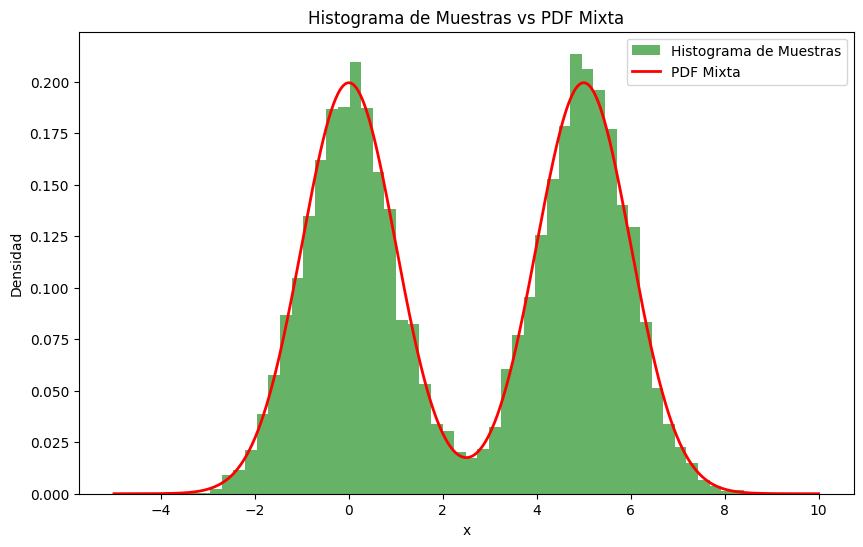

In [10]:
# Graficar el histograma de las muestras
plt.figure(figsize=(10, 6))
plt.hist(muestras, bins=50, density=True, alpha=0.6, color='g', label='Histograma de Muestras')
plt.plot(x, pdf_mixta(x, mu1, sigma1, p1, mu2, sigma2, p2), 'r-', lw=2, label='PDF Mixta')
plt.title('Histograma de Muestras vs PDF Mixta')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()